In [7]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

covid_table = pd.read_csv('full_data.csv')

In [8]:
covid_table.head()

,Confirmed,Deaths,Recovered,Province/State,Country/Region,Lat,Long,Date,year,month,day
0,0.0,0.0,0.0,NaN,Afghanistan,33.0000,65.0000,1/22/20,1,22,20
1,0.0,0.0,0.0,NaN,Albania,41.1533,20.1683,1/22/20,1,22,20
2,0.0,0.0,0.0,NaN,Algeria,28.0339,1.6596,1/22/20,1,22,20
3,0.0,0.0,0.0,NaN,Andorra,42.5063,1.5218,1/22/20,1,22,20
4,0.0,0.0,0.0,NaN,Angola,-11.2027,17.8739,1/22/20,1,22,20


* Province/State는 모두 결측값이므로 제거한다.

In [11]:
covidDF = covid_table.drop(['Province/State','Date'], axis='columns')

In [12]:
covidDF.head()

,Confirmed,Deaths,Recovered,Country/Region,Lat,Long,year,month,day
0,0.0,0.0,0.0,Afghanistan,33.0000,65.0000,1,22,20
1,0.0,0.0,0.0,Albania,41.1533,20.1683,1,22,20
2,0.0,0.0,0.0,Algeria,28.0339,1.6596,1,22,20
3,0.0,0.0,0.0,Andorra,42.5063,1.5218,1,22,20
4,0.0,0.0,0.0,Angola,-11.2027,17.8739,1,22,20


* 회귀를 통한 예측

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

print('COVID 데이터 셋 크기:', covidDF.shape)
covidDF.head()

COVID 데이터 셋 크기: (35775, 9)


,Confirmed,Deaths,Recovered,Country/Region,Lat,Long,year,month,day
0,0.0,0.0,0.0,Afghanistan,33.0000,65.0000,1,22,20
1,0.0,0.0,0.0,Albania,41.1533,20.1683,1,22,20
2,0.0,0.0,0.0,Algeria,28.0339,1.6596,1,22,20
3,0.0,0.0,0.0,Andorra,42.5063,1.5218,1,22,20
4,0.0,0.0,0.0,Angola,-11.2027,17.8739,1,22,20


In [18]:
covidDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35775 entries, 0 to 35774
Data columns (total 9 columns):
Confirmed         35775 non-null float64
Deaths            35775 non-null float64
Recovered         35775 non-null float64
Country/Region    35775 non-null object
Lat               35775 non-null float64
Long              35775 non-null float64
year              35775 non-null int64
month             35775 non-null int64
day               35775 non-null int64
dtypes: float64(5), int64(3), object(1)
memory usage: 2.5+ MB


* object 형식이 하나 있으니 이것을 원핫인코딩으로 변환한다.

In [21]:
covidOH = pd.get_dummies(covidDF)

In [22]:
covidOH.head()

,Confirmed,Deaths,Recovered,Lat,Long,year,month,day,Country/Region_Afghanistan,Country/Region_Albania,...,Country/Region_United Kingdom,Country/Region_Uruguay,Country/Region_Uzbekistan,Country/Region_Venezuela,Country/Region_Vietnam,Country/Region_West Bank and Gaza,Country/Region_Western Sahara,Country/Region_Yemen,Country/Region_Zambia,Country/Region_Zimbabwe
0,0.0,0.0,0.0,33.0000,65.0000,1,22,20,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,41.1533,20.1683,1,22,20,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,28.0339,1.6596,1,22,20,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,42.5063,1.5218,1,22,20,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,-11.2027,17.8739,1,22,20,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
covidOH.columns[0:7]

Index(['Confirmed', 'Deaths', 'Recovered', 'Lat', 'Long', 'year', 'month'], dtype='object')

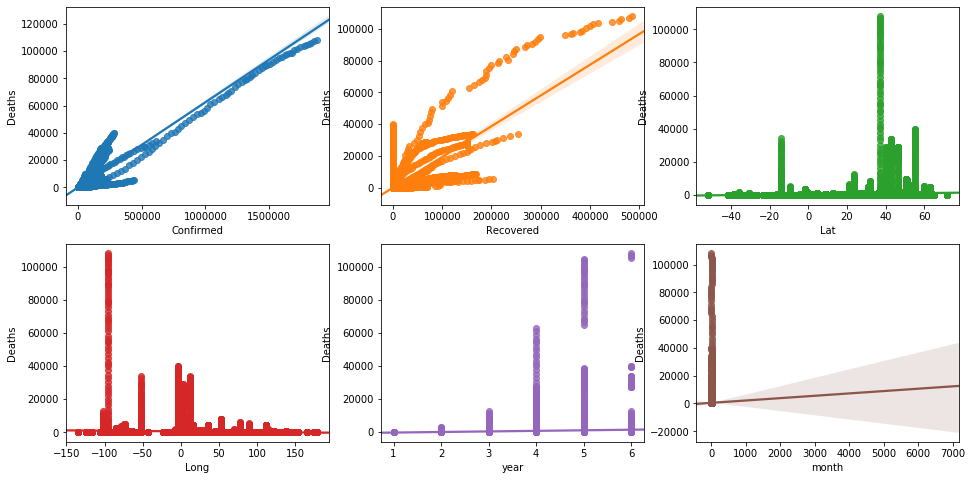

In [31]:
# 각 칼럼이 회귀 결과에 미치는 영향 확인
# 3*2 subplots 이용한다. axs는 3x2개의 ax가진다.
fig, axs = plt.subplots(figsize=(16, 8), ncols=3, nrows=2)
lm_features = ['Confirmed', 'Recovered', 'Lat', 'Long', 'year', 'month']
for i, feature in enumerate(lm_features):
    row = int(i/3) # 몫
    col = i%3 # 나머지 연산
    
    # 시본의 regplot으로 산점도, 선형 회귀 직선 함께 표현
    sns.regplot(x=feature, y='Deaths', data=covidOH, ax=axs[row][col])

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_target = covidOH['Deaths']
X_data = covidOH.drop(['Deaths'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_preds)

print('############### Linear Regression #######################')
print('MSE : {0:.3f}, RMSE : {1:.3f}, MAE : {2:.3f}'.format(mse, rmse, mae))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

############### Linear Regression #######################
MSE : 1344488.772, RMSE : 1159.521, MAE : 314.705
Variance score : 0.905


In [35]:
print('절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

절편 값:  -683.5666662897922
회귀 계수 값:  [ 1.0000e-01 -0.0000e+00  2.6000e+01  5.7000e+00  1.1200e+01 -1.0000e-01
 -0.0000e+00 -6.8150e+02 -5.4560e+02 -2.0300e+01 -4.6790e+02  8.3460e+02
  5.6080e+02  1.9514e+03 -7.3230e+02  6.4440e+02 -9.1810e+02 -7.3010e+02
  4.4520e+02 -4.6100e+02 -7.1870e+02  6.4670e+02 -1.4430e+03  1.1884e+03
  6.4680e+02  3.8910e+02 -5.8700e+02  1.3962e+03 -6.0500e+02  1.0834e+03
  1.2182e+03 -1.3640e+02 -6.1840e+02  3.3790e+02 -4.7570e+02  5.6220e+02
  3.4260e+02 -2.5990e+02  4.3980e+02 -8.7200e+01  3.4890e+02  1.4250e+02
  1.0728e+03 -8.8260e+02  8.3640e+02  6.9780e+02  6.2410e+02  6.1110e+02
  8.5200e+02  4.4270e+02 -6.4040e+02  5.2070e+02 -4.7330e+02 -8.5900e+02
 -9.4330e+02  6.1860e+02  5.4600e+01  5.9930e+02  4.3330e+02  1.1961e+03
 -2.5820e+02  7.8540e+02  5.3900e+02  2.5100e+01 -1.0448e+03  1.1519e+03
  1.7060e+02  8.3500e+01 -1.2225e+03  1.0225e+03  5.7310e+02  3.8710e+02
 -7.1310e+02 -2.8480e+03  3.4410e+02 -5.0670e+02  6.8780e+02  7.3030e+02
  3.9890e+02  4

In [40]:
# 회귀 계수를 큰 값 순으로 정렬하고자 Series로 생성하며 인덱스 칼럼명에 유의한다.
# 서로 매칭을 시키되 인덱스를 활용한다.
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff[0:10].sort_values(ascending=False) # 오름차순을 방지하여 칼럼 순을 유지하도록 만든다.

Lat                            26.0
year                           11.2
Long                            5.7
Confirmed                       0.1
day                            -0.0
Recovered                      -0.0
month                          -0.1
Country/Region_Algeria        -20.3
Country/Region_Albania       -545.6
Country/Region_Afghanistan   -681.5
dtype: float64

In [44]:
from sklearn.model_selection import cross_val_score

y_target = covidOH['Deaths']
X_data = covidOH.drop(['Deaths'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 셋으로 MSE 구한 뒤 이를 기반으로 다시 RMSE 구한다.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores) # neg_mse_score는 음수 값이므로 다시 -1을 곱해서 표기한다.
avg_rmse = np.mean(rmse_scores) # 평균을 내어 RMSE를 구해낸다.

neg_mae_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_absolute_error", cv=5)
mae_scores = -1 * neg_mae_scores
avg_mae = np.mean(mae_scores) # 평균을 내어 RMSE를 구해낸다.


print('################# Linear Regression ############################')
print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE: {0:.3f}'.format(avg_rmse))

print('5 folds 의 개별 Negative MAE scores: ', np.round(neg_mae_scores, 2))
print('5 folds 의 개별 MAE scores: ', np.round(mae_scores, 2))
print('5 folds 의 평균 MAE: {0:.3f}'.format(avg_mae))

################# Linear Regression ############################
5 folds 의 개별 Negative MSE scores:  [ -941676.24  -948294.59  -530103.38 -1666327.09 -5562878.59]
5 folds 의 개별 RMSE scores:  [ 970.4   973.8   728.08 1290.86 2358.58]
5 folds 의 평균 RMSE: 1264.345
5 folds 의 개별 Negative MAE scores:  [-341.1  -328.66 -265.46 -308.1  -656.59]
5 folds 의 개별 MAE scores:  [341.1  328.66 265.46 308.1  656.59]
5 folds 의 평균 MAE: 379.982


# 릿지 회귀

In [45]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha=10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

neg_mae_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_absolute_error", cv=5)
mae_scores = -1 * neg_mae_scores
avg_mae = np.mean(mae_scores) # 평균을 내어 RMSE를 구해낸다.

print('################# Ridge Regression ############################')
print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE: {0:.3f}'.format(avg_rmse))

print('5 folds 의 개별 Negative MAE scores: ', np.round(neg_mae_scores, 2))
print('5 folds 의 개별 MAE scores: ', np.round(mae_scores, 2))
print('5 folds 의 평균 MAE: {0:.3f}'.format(avg_mae))

################# Ridge Regression ############################
5 folds 의 개별 Negative MSE scores:  [ -754072.49  -760201.59  -447406.07 -1767918.85 -5704483.47]
5 folds 의 개별 RMSE scores:  [ 868.37  871.9   668.88 1329.63 2388.41]
5 folds 의 평균 RMSE: 1225.438
5 folds 의 개별 Negative MAE scores:  [-305.85 -296.63 -250.02 -311.59 -658.53]
5 folds 의 개별 MAE scores:  [305.85 296.63 250.02 311.59 658.53]
5 folds 의 평균 MAE: 364.526


In [47]:
# 릿지에 사용될 alpha 파라미터 값 정의
alphas = [0, 0.1, 1, 10, 100]

# alpha list 값을 반복하면서 alpha에 따른 평균 rmse 구하기
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    # cross_val_score로 5 폴드의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    neg_mae_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_absolute_error", cv=5)
    mae_scores = -1 * neg_mae_scores
    avg_mae = np.mean(mae_scores)
    print('alpha {0} 일 때 5 folds의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))
    print('alpha {0} 일 때 5 folds의 평균 MAE: {1:.3f}'.format(alpha, avg_mae))

alpha 0 일 때 5 folds의 평균 RMSE: 26058.855
alpha 0 일 때 5 folds의 평균 MAE: 8544.313
alpha 0.1 일 때 5 folds의 평균 RMSE: 1263.806
alpha 0.1 일 때 5 folds의 평균 MAE: 379.656
alpha 1 일 때 5 folds의 평균 RMSE: 1259.190
alpha 1 일 때 5 folds의 평균 MAE: 377.083
alpha 10 일 때 5 folds의 평균 RMSE: 1225.438
alpha 10 일 때 5 folds의 평균 MAE: 364.526
alpha 100 일 때 5 folds의 평균 RMSE: 1110.364
alpha 100 일 때 5 folds의 평균 MAE: 339.380


* alpha가 커질수록 RMSE, MAE는 줄어드는 것을 확인할 수 있다.

# 라쏘 회귀, ElasticNet

In [51]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE로 출력하고 회귀 계수값들을 Dataframe으로 변환

def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('######', model_name, '#####')
    for param in params:
        if model_name == 'Ridge' : model = Ridge(alpha=param)
        elif model_name == 'Lasso' : model = Lasso(alpha=param)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n,
                                        scoring="neg_mean_squared_error", cv=5)
        
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        
        neg_mae_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_absolute_error", cv=5)
        mae_scores = -1 * neg_mae_scores
        avg_mae = np.mean(mae_scores)
    
        print('alpha {0} 일 때 5 폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
        print('alpha {0} 일 때 5 폴드 세트의 평균 MAE: {1:.3f}'.format(param, avg_mae))
        # cross_Val_Score는 evaluation metric만 반환하므로 모델 다시 학습해서 회귀 계수 추출
        model.fit(X_data, y_target)
        # alpha에 따른 피처별 회귀 계수를 Series로 변환 후 이를 칼럼으로 추가
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname = 'alpha:' + str(param)
        coeff_df[colname] = coeff
        
    return coeff_df

In [52]:
# 라쏘에 사용할 alpha 파라미터 값 정의 및 함수 호출
lasso_alpha = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alpha, X_data_n=X_data, y_target_n=y_target)

###### Lasso #####
alpha 0.07 일 때 5 폴드 세트의 평균 RMSE: 1261.627
alpha 0.07 일 때 5 폴드 세트의 평균 MAE: 375.869
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 1260.787
alpha 0.1 일 때 5 폴드 세트의 평균 MAE: 375.336
alpha 0.5 일 때 5 폴드 세트의 평균 RMSE: 1254.984
alpha 0.5 일 때 5 폴드 세트의 평균 MAE: 378.209
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 1247.170
alpha 1 일 때 5 폴드 세트의 평균 MAE: 368.235
alpha 3 일 때 5 폴드 세트의 평균 RMSE: 1222.545
alpha 3 일 때 5 폴드 세트의 평균 MAE: 352.340


In [53]:
# 엘라스틱넷에 사용될 alpha 파라미터 값 정의 및 get_linear_reg_eval() 함수 호출
# ㅣ1_ratio 0.7 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

###### ElasticNet #####
alpha 0.07 일 때 5 폴드 세트의 평균 RMSE: 1054.276
alpha 0.07 일 때 5 폴드 세트의 평균 MAE: 312.480
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 1050.292
alpha 0.1 일 때 5 폴드 세트의 평균 MAE: 306.998
alpha 0.5 일 때 5 폴드 세트의 평균 RMSE: 1043.879
alpha 0.5 일 때 5 폴드 세트의 평균 MAE: 290.039
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 1044.755
alpha 1 일 때 5 폴드 세트의 평균 MAE: 287.982
alpha 3 일 때 5 폴드 세트의 평균 RMSE: 1046.434
alpha 3 일 때 5 폴드 세트의 평균 MAE: 286.372
